### Mushroom classification
##### Safe to eat or deadly posion?

Kaggle dataset: https://www.kaggle.com/uciml/mushroom-classification
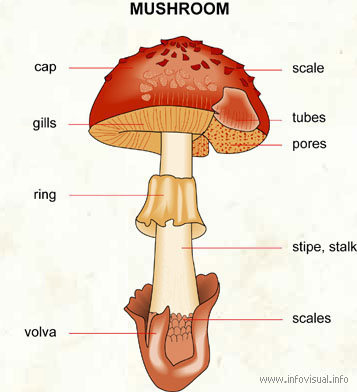

#### Features - 23
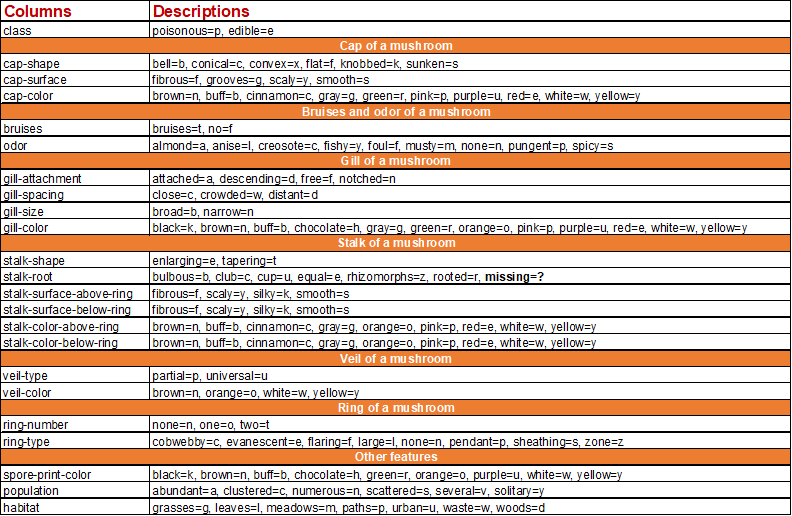

##### Cap-related features:
* Shape and surface
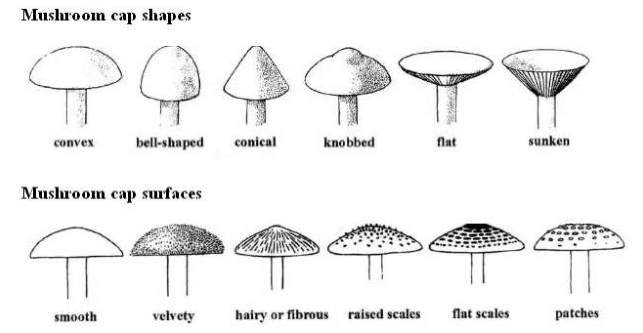

##### Gill-related features:
* Attachement
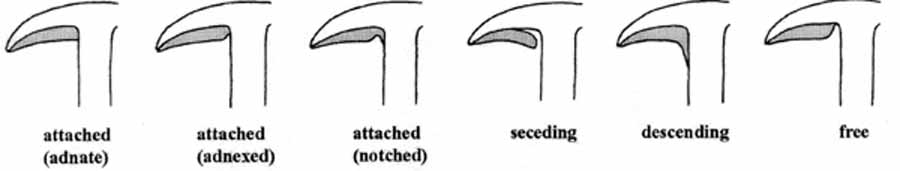

* Spacing
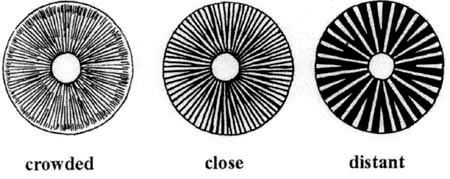

##### Stalk-related features:
* root
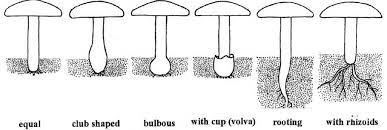

#### Veil-related features
* Type


#### Ring-related features
* Type 
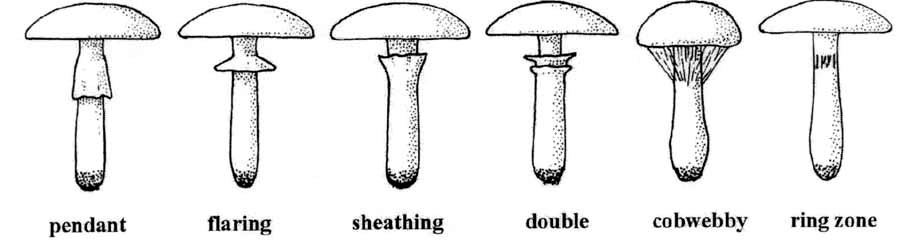

#### Spore print
* Color
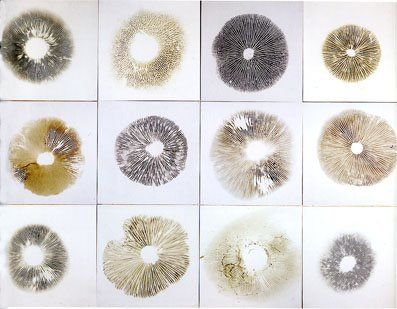

#### Population
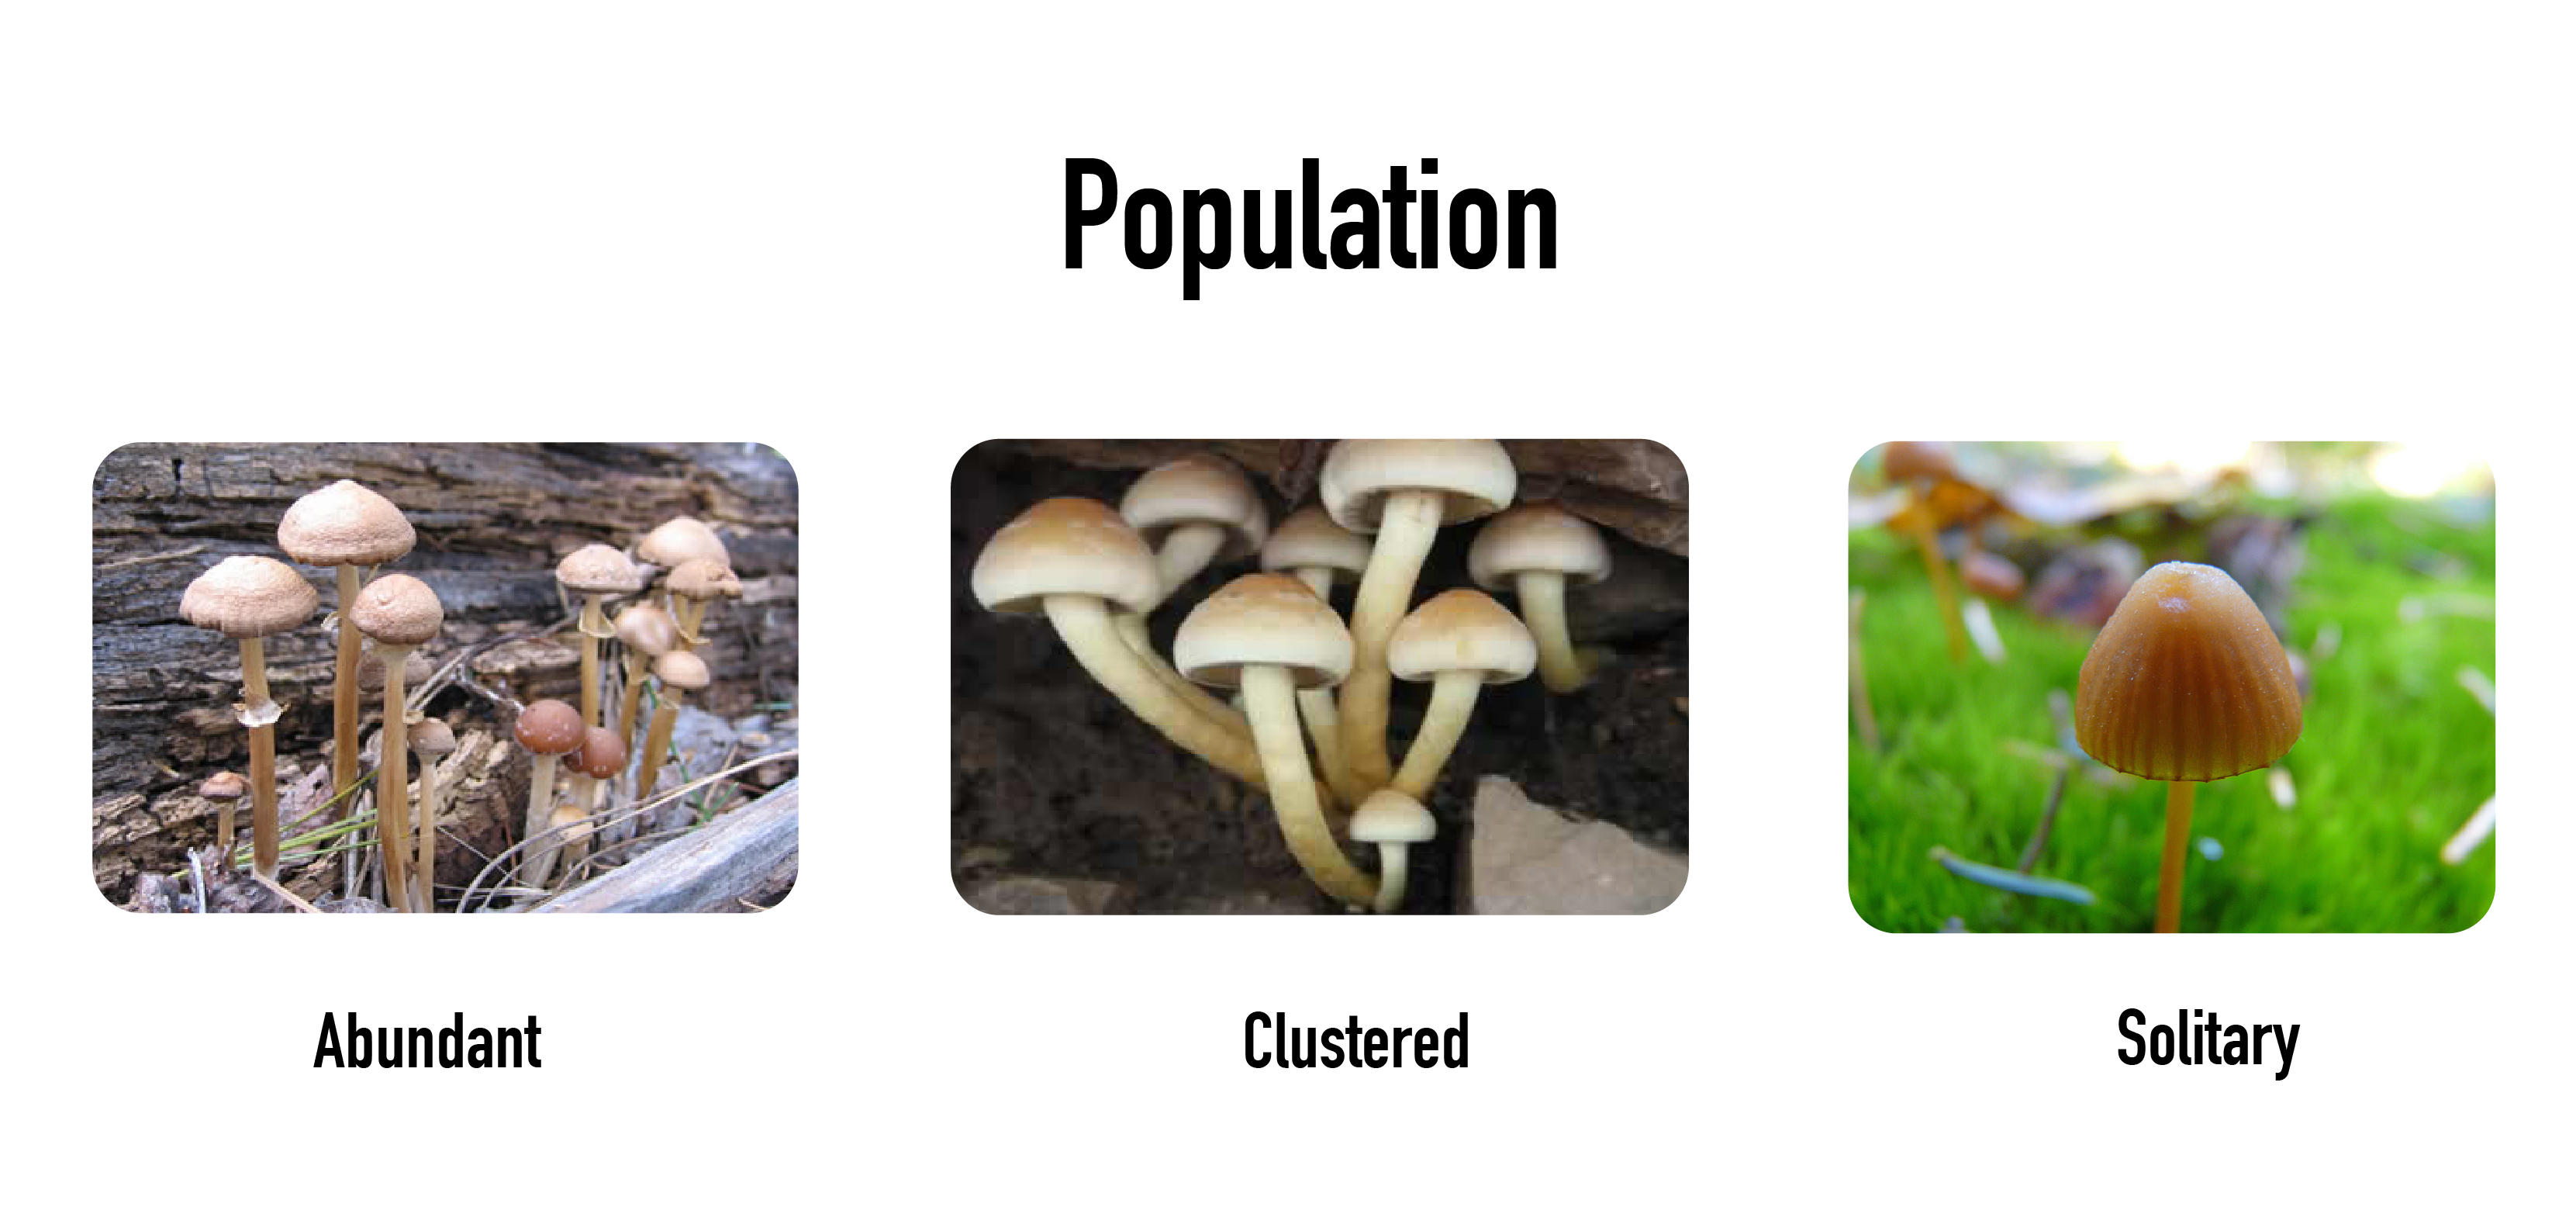

### Reading data

In [158]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

In [2]:
data = pd.read_csv('./mushrooms.csv')
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [5]:
data.describe().T

count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   p  3968
spore-print-color         8124      9   w  2388
population                8124      6   v  4040
habitat                   8124      7   d  3148

In [4]:
# basic features of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

###### *8124 non-null values (instances) across the dataset, all features are object type*

In [26]:
# checking unique values of each feature
data.nunique().sort_values()

veil-type                    1
class                        2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

In [14]:
# "class" is our target column
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
poisonous = data[data['class'] == 'p']
poisonous.describe().T

count unique top  freq
class                     3916      1   p  3916
cap-shape                 3916      5   x  1708
cap-surface               3916      4   y  1740
cap-color                 3916      8   n  1020
bruises                   3916      2   f  3292
odor                      3916      7   f  2160
gill-attachment           3916      2   f  3898
gill-spacing              3916      2   c  3804
gill-size                 3916      2   n  2224
gill-color                3916     10   b  1728
stalk-shape               3916      2   t  2016
stalk-root                3916      4   b  1856
stalk-surface-above-ring  3916      4   k  2228
stalk-surface-below-ring  3916      4   k  2160
stalk-color-above-ring    3916      6   w  1712
stalk-color-below-ring    3916      6   w  1680
veil-type                 3916      1   p  3916
veil-color                3916      2   w  3908
ring-number               3916      3   o  3808
ring-type                 3916      4   e  1768
spore-print-color         3916      5   w  1812
population                3916      4   v  2848
habitat                   3916      6   d  1268

In [7]:
edible = data[data['class'] == 'e']
edible.describe().T

count unique top  freq
class                     4208      1   e  4208
cap-shape                 4208      5   x  1948
cap-surface               4208      3   f  1560
cap-color                 4208     10   n  1264
bruises                   4208      2   t  2752
odor                      4208      3   n  3408
gill-attachment           4208      2   f  4016
gill-spacing              4208      2   c  3008
gill-size                 4208      2   b  3920
gill-color                4208     10   w   956
stalk-shape               4208      2   t  2592
stalk-root                4208      5   b  1920
stalk-surface-above-ring  4208      4   s  3640
stalk-surface-below-ring  4208      4   s  3400
stalk-color-above-ring    4208      6   w  2752
stalk-color-below-ring    4208      6   w  2704
veil-type                 4208      1   p  4208
veil-color                4208      3   w  4016
ring-number               4208      2   o  3680
ring-type                 4208      3   p  3152
spore-print-color         4208      8   n  1744
population                4208      6   v  1192
habitat                   4208      7   d  1880

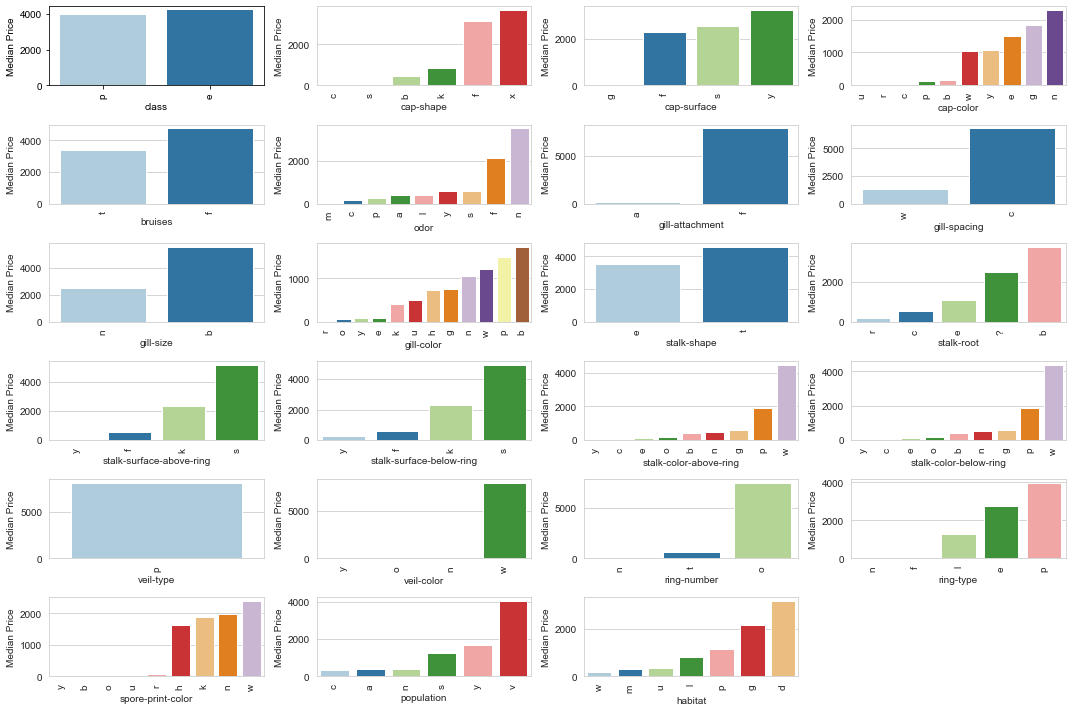

In [9]:
plt.figure(figsize=(15,10))

for i, col in enumerate(data.columns):
    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(6,4,i+1)
    sns.countplot(
        x=col, data = data, ax = ax, 
        order = data[col].value_counts(ascending=True).index
    )
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("Median Price")
    plt.tight_layout()
plt.show()

In [10]:
# dropping "veil-type" column as there is only one constant value "p"
data.drop(columns="veil-type", inplace = True)
data

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-above-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        s   
8123            c         b          y  ...                        s   

     stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                           s                      w                      w   
1                           s                      w                      w   
2                           s                      w                      w   
3                           s                      w                      w   
4                           s                      w                      w   
...                       ...                    ...                    ...   
8119                        s                      o                      o   
8120                        s                      o                      o   
8121                        s                      o                      o   
8122                        k                      w                      w   
8123                        s                      o                      o   

     veil-color ring-number ring-type spore-print-color population habitat  
0             w           o         p                 k          s       u  
1             w           o         p                 n          n       g  
2             w           o         p                 n          n       m  
3             w           o         p                 k          s       u  
4             w           o         e                 n          a       g  
...         ...         ...       ...               ...        ...     ...  
8119          o           o         p                 b          c       l  
8120          n           o         p                 b          v       l  
8121          o           o         p                 b          c       l  
8122          w           o         e                 w          v       l  
8123          o           o         p                 o          c       l  

[8124 rows x 22 columns]

## Charts for key features

### Cap shape

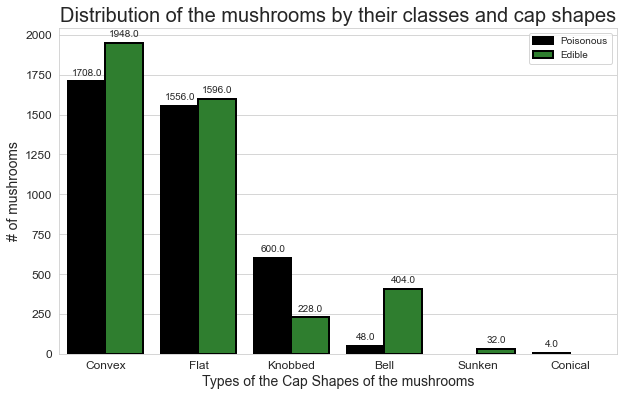

In [131]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='cap-shape',
                      hue='class',
                      order=data['cap-shape'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the mushrooms by their classes and cap shapes', fontsize=20)
pass

### Cap surface

Text(0.5, 1.0, 'Distribution of the mushrooms by their Classes and Cap Surfaces')

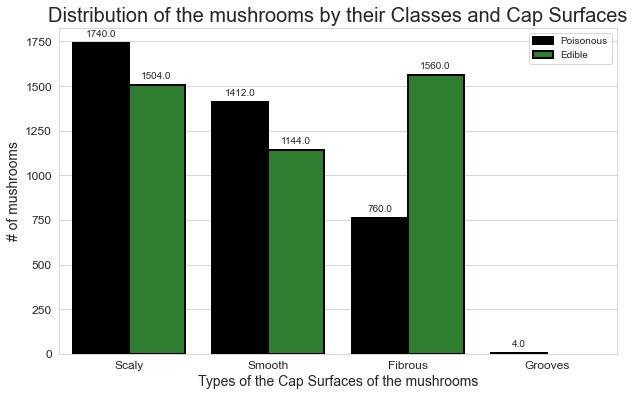

In [105]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='cap-surface',
                      hue='class',
                      order=data['cap-surface'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the mushrooms by their Classes and Cap Surfaces', fontsize=20)

### Cap color

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Colors')

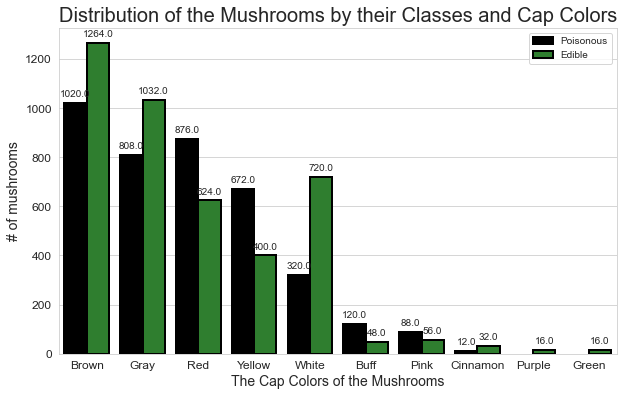

In [106]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='cap-color',
                      hue='class',
                      order=data['cap-color'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('The Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Colors', fontsize=20)

### Bruises

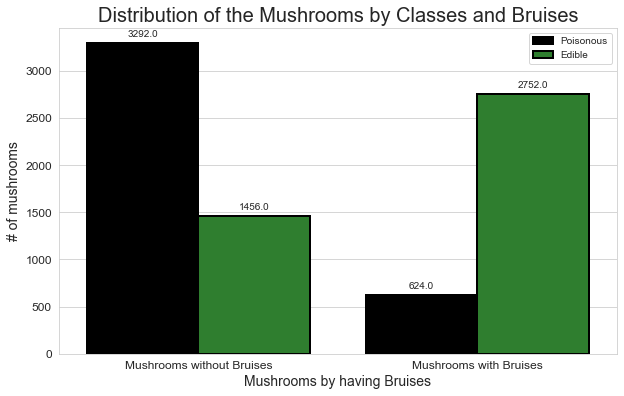

In [107]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='bruises',
                      hue='class',
                      order=data['bruises'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushrooms without Bruises', 'Mushrooms with Bruises'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Mushrooms by having Bruises', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Bruises', fontsize=20)
pass

### Odor

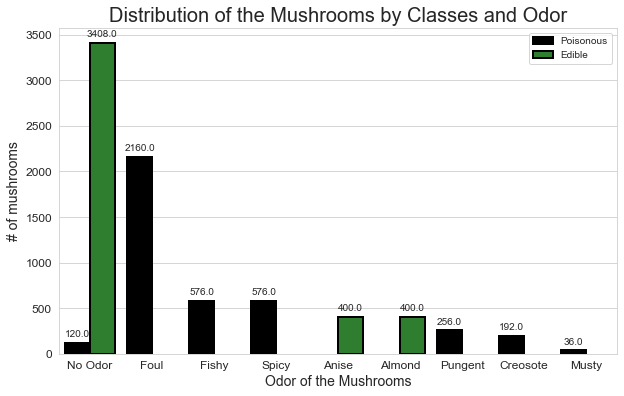

In [139]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='odor',
                      hue='class',
                      order=data['odor'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent',
                       'Creosote', 'Musty'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Odor of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Odor', fontsize=20)
pass

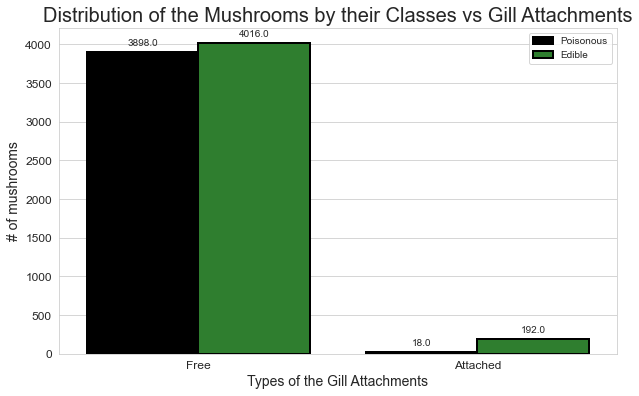

In [109]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='gill-attachment',
                      hue='class',
                      order=data['gill-attachment'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Free', 'Attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Attachments', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Attachments', fontsize=20)
pass

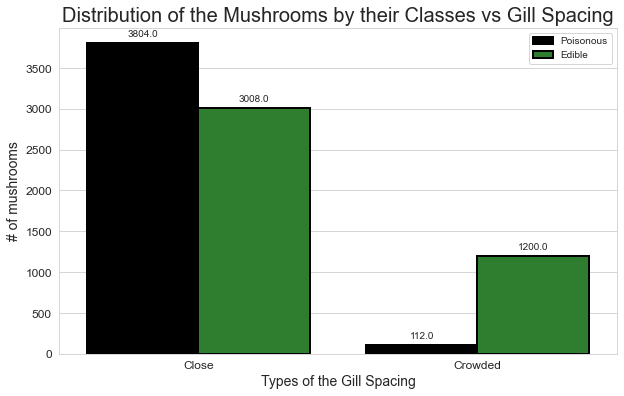

In [110]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='gill-spacing',
                      hue='class',
                      order=data['gill-spacing'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Close', 'Crowded'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Spacing', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Spacing', fontsize=20)
pass

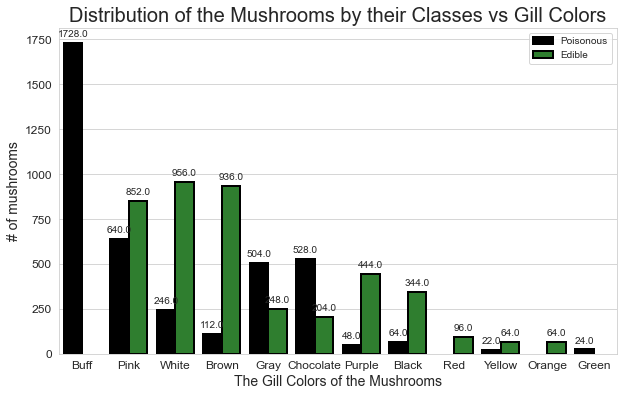

In [111]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='gill-color',
                      hue='class',
                      order=data['gill-color'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('The Gill Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Colors', fontsize=20)
pass

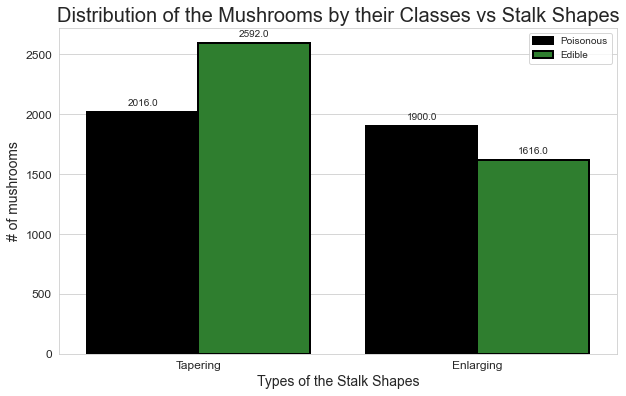

In [112]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='stalk-shape',
                      hue='class',
                      order=data['stalk-shape'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Tapering', 'Enlarging'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Shapes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Shapes', fontsize=20)
pass

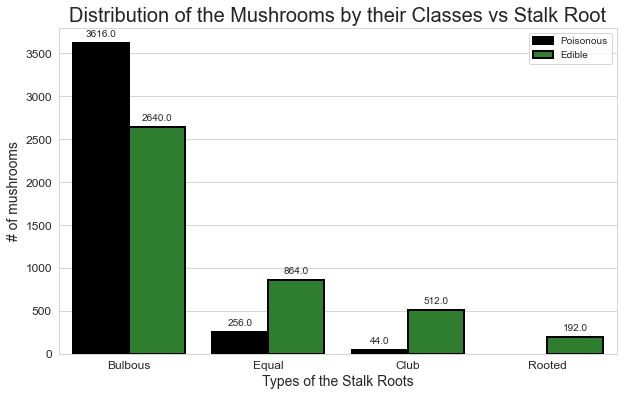

In [113]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='stalk-root',
                      hue='class',
                      order=data['stalk-root'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2
                      )

splot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Roots', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Root', fontsize=20)
pass

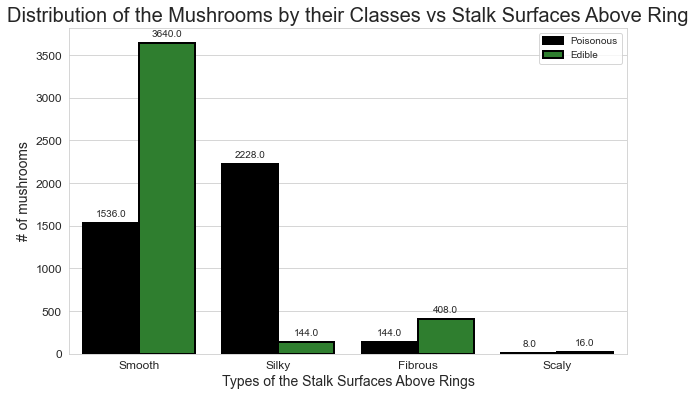

In [121]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='stalk-surface-above-ring',
                      hue='class',
                      order=data['stalk-surface-above-ring'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surfaces Above Rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Surfaces Above Ring', fontsize=20)
pass

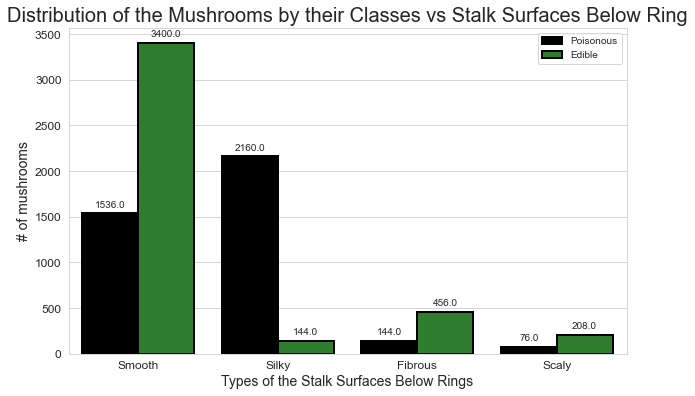

In [122]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='stalk-surface-below-ring',
                      hue='class',
                      order=data['stalk-surface-below-ring'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surfaces Below Rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Surfaces Below Ring', fontsize=20)
pass

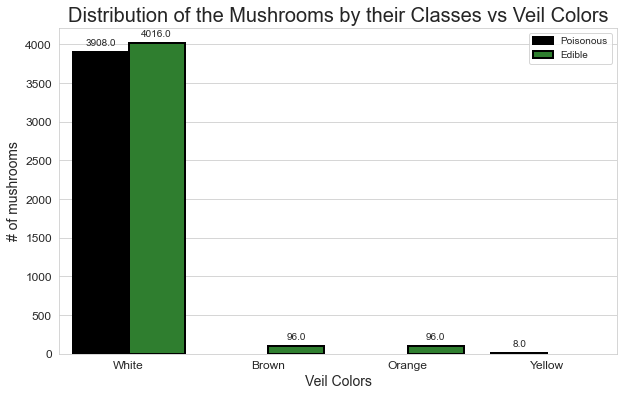

In [123]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='veil-color',
                      hue='class',
                      order=data['veil-color'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Veil Colors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Veil Colors', fontsize=20)
pass

In [32]:
x = ['None', 'One', 'Two']
y = ['Poisonous', 'Edible']
z = [[data[data['class'] == 'p']['ring-number'].value_counts()[2],
      data[data['class'] == 'p']['ring-number'].value_counts()[0],
      data[data['class'] == 'p']['ring-number'].value_counts()[1]],
     [0, data[data['class'] == 'e']['ring-number'].value_counts()[0],
      data[data['class'] == 'e']['ring-number'].value_counts()[1]]
     ]

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='magma')
fig.update_layout(title_text='Heatmap of the Mushrooms by their Classes vs Number of the Rings',
                  title_x=0.5, title_font=dict(size=22))
fig.update_layout(xaxis=dict(
    tickfont=dict(size=15),
),
    yaxis=dict(tickfont=dict(size=15)))
fig.show()

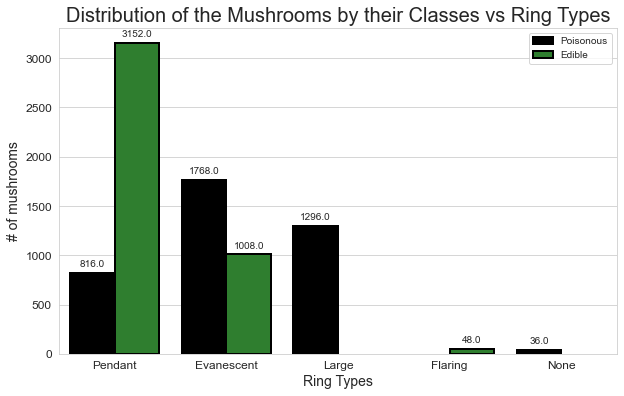

In [124]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='ring-type',
                      hue='class',
                      order=data['ring-type'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Ring Types', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Ring Types', fontsize=20)
pass

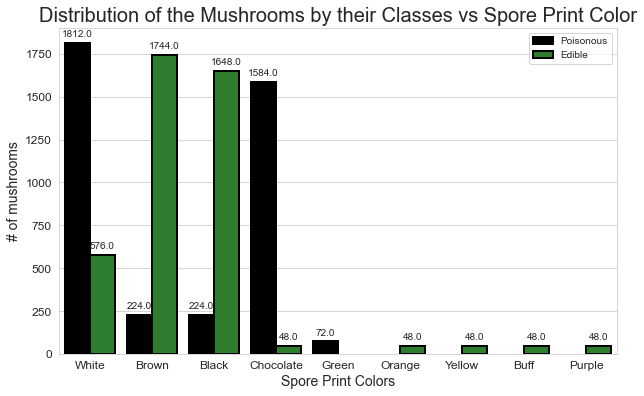

In [144]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='spore-print-color',
                      hue='class',
                      order=data['spore-print-color'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Spore Print Colors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Spore Print Color', fontsize=20)
pass

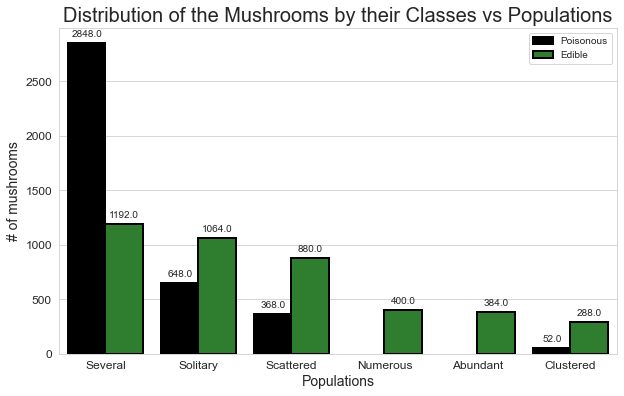

In [143]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='population',
                      hue='class',
                      order=data['population'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Populations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Populations', fontsize=20)
pass

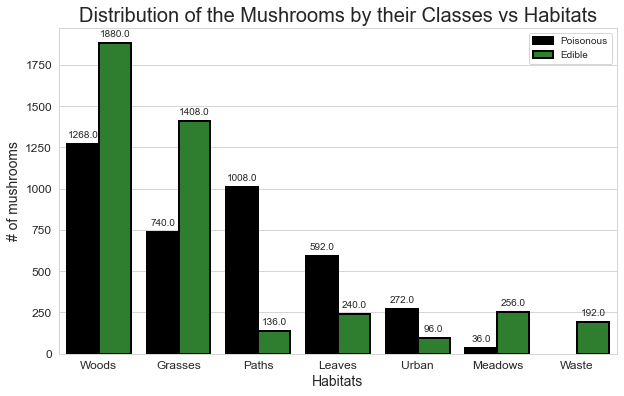

In [142]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='habitat',
                      hue='class',
                      order=data['habitat'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Habitats', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Habitats', fontsize=20)
pass

### Data pre-processing

In [149]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#label encoder to convert words into numbers
le = LabelEncoder()
for col in list(data.columns):
    data[col] = le.fit_transform(data[col])

In [150]:
data

class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                   1             0          0           5  ...   
3                   1             0          1           5  ...   
4                   1             1          0           4  ...   
...               ...           ...        ...         ...  ...   
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-surface-above-ring  stalk-surface-below-ring  \
0                            2                         2   
1                            2                         2   
2                            2                         2   
3                            2                         2   
4                            2                         2   
...                        ...                       ...   
8119                         2                         2   
8120                         2                         2   
8121                         2                         2   
8122                         2                         1   
8123                         2                         2   

      stalk-color-above-ring  stalk-color-below-ring  veil-color  ring-number  \
0                          7                       7           2            1   
1                          7                       7           2            1   
2                          7                       7           2            1   
3                          7                       7           2            1   
4                          7                       7           2            1   
...                      ...                     ...         ...          ...   
8119                       5                       5           1            1   
8120                       5                       5           0            1   
8121                       5                       5           1            1   
8122                       7                       7           2            1   
8123                       5                       5           1            1   

      ring-type  spore-print-color  population  habitat  
0             4                  2           3        5  
1             4                  3           2        1  
2             4                  3           2        3  
3             4                  2           3        5  
4             0                  3           0        1  
...         ...                ...         ...      ...  
8119          4                  0           1        2  
8120          4                  0           4        2  
8121          4                  0           1        2  
8122          0                  7           4        2  
8123          4                  4           1        2  

[8124 rows x 22 columns]

In [177]:
# class is a target column - we have to drop it
X = data.drop('class', axis=1)
y = data['class']
X.head()

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2                       7   
1                         2                         2                       7   
2                         2                         2                       7   
3                         2                         2                       7   
4                         2                         2                       7   

   stalk-color-below-ring  veil-color  ring-number  ring-type  \
0                       7           2            1          4   
1                       7           2            1          4   
2                       7           2            1          4   
3                       7           2            1          4   
4                       7           2            1          0   

   spore-print-color  population  habitat  
0                  2           3        5  
1                  3           2        1  
2                  3           2        3  
3                  2           3        5  
4                  3           0        1  

[5 rows x 21 columns]

In [185]:
data.describe().round(2)

class  cap-shape  cap-surface  cap-color  bruises     odor  \
count  8124.00    8124.00      8124.00    8124.00  8124.00  8124.00   
mean      0.48       3.35         1.83       4.50     0.42     4.14   
std       0.50       1.60         1.23       2.55     0.49     2.10   
min       0.00       0.00         0.00       0.00     0.00     0.00   
25%       0.00       2.00         0.00       3.00     0.00     2.00   
50%       0.00       3.00         2.00       4.00     0.00     5.00   
75%       1.00       5.00         3.00       8.00     1.00     5.00   
max       1.00       5.00         3.00       9.00     1.00     8.00   

       gill-attachment  gill-spacing  gill-size  gill-color  ...  \
count          8124.00       8124.00    8124.00     8124.00  ...   
mean              0.97          0.16       0.31        4.81  ...   
std               0.16          0.37       0.46        3.54  ...   
min               0.00          0.00       0.00        0.00  ...   
25%               1.00          0.00       0.00        2.00  ...   
50%               1.00          0.00       0.00        5.00  ...   
75%               1.00          0.00       1.00        7.00  ...   
max               1.00          1.00       1.00       11.00  ...   

       stalk-surface-above-ring  stalk-surface-below-ring  \
count                   8124.00                   8124.00   
mean                       1.58                      1.60   
std                        0.62                      0.68   
min                        0.00                      0.00   
25%                        1.00                      1.00   
50%                        2.00                      2.00   
75%                        2.00                      2.00   
max                        3.00                      3.00   

       stalk-color-above-ring  stalk-color-below-ring  veil-color  \
count                 8124.00                 8124.00     8124.00   
mean                     5.82                    5.79        1.97   
std                      1.90                    1.91        0.24   
min                      0.00                    0.00        0.00   
25%                      6.00                    6.00        2.00   
50%                      7.00                    7.00        2.00   
75%                      7.00                    7.00        2.00   
max                      8.00                    8.00        3.00   

       ring-number  ring-type  spore-print-color  population  habitat  
count      8124.00    8124.00            8124.00     8124.00  8124.00  
mean          1.07       2.29               3.60        3.64     1.51  
std           0.27       1.80               2.38        1.25     1.72  
min           0.00       0.00               0.00        0.00     0.00  
25%           1.00       0.00               2.00        3.00     0.00  
50%           1.00       2.00               3.00        4.00     1.00  
75%           1.00       4.00               7.00        4.00     2.00  
max           2.00       4.00               8.00        5.00     6.00  

[8 rows x 22 columns]

<AxesSubplot:>

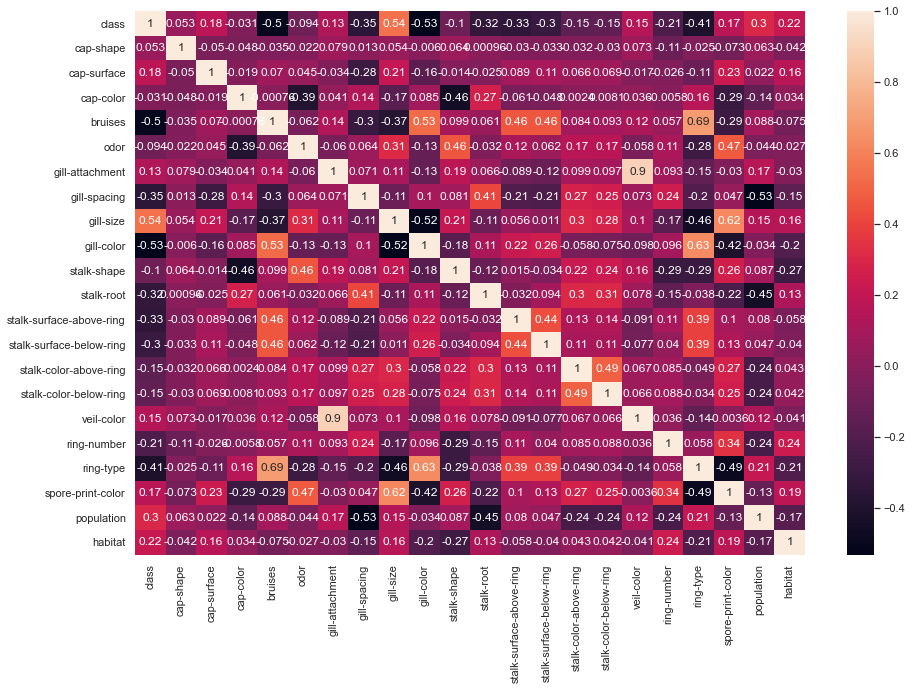

In [186]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(), annot=True)